Author: Carlos Roberto de Melo

Date: 04/23/2020

Obj: Build a elliptical profile for velocity dispersion.

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter as clock

In [2]:
hdu = fits.open('/home/carlos/Desktop/ESO325 MUSE-ColletBinning (01-07-20)/Data/Velocity Dispersion Map Second Run.fits')
data = hdu[1].data #Velocity Dispersion
var = hdu[2].data  #1-sigma erro
copy = data
data.shape

(20, 20)

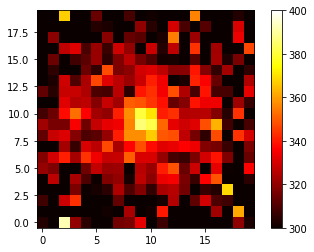

In [3]:
plt.imshow(data, vmin=300, vmax=400,origin='lower',cmap='hot')
plt.colorbar()

In [7]:
#Define the ellipse properties based on MGE
e = 0.240                       #Ellipticity of MGE 
                            
theta = 380-22.3                #Angle in degree
x0 = 9                          #x center in px
y0 = 9                          #y center in px
x_length = copy.shape[1]        #Length of x axis
y_length = copy.shape[0]        #Length of y axis

In [8]:
#Define the loop
t = clock()
r = []    #Position of each px
disp = [] #Value of velocity dispersion in each px
erro = [] #Value of 1-sigma error from pPXF
for y in range(y_length):
    for x in range(x_length):
        
        
        #Here we define the new origin of coordinate system
        x_0 = x - x0 #Translated X Position 
        y_0 = y - y0 #Translated Y Position
        #Distance from the ellipse center
        distance = np.sqrt(((((x_0**2)*((np.cos(theta*np.pi/180)**2)*(1-e)**2 + np.sin(theta*np.pi/180)**2) +
                        (y_0**2)*((np.sin(theta*np.pi/180)**2)*(1-e)**2 + np.cos(theta*np.pi/180)**2) +
                            2*e*np.sin(theta*np.pi/180)*np.cos(theta*np.pi/180)*x_0*y_0*(2-e)))/(1-e)**2)*0.6)
        r.append(distance)      #Save the distance
        disp.append(data[y][x]) #Take the velocity dispersion in this px
        erro.append(var[y][x])  #Take the error of velocity dispersion in this px
            
        print('Position (%d,%d), New Position (%d,%d), Dispersion %f, Distance %f' %(y,x,y_0, x_0,data[y][x],distance))

print('Time: %f'%(clock()-t))

Position (0,0), New Position (-9,-9), Dispersion 303.612854, Distance 11.396969
Position (0,1), New Position (-9,-8), Dispersion 243.743866, Distance 10.954250
Position (0,2), New Position (-9,-7), Dispersion 392.317688, Distance 10.549962
Position (0,3), New Position (-9,-6), Dispersion 320.577820, Distance 10.188681
Position (0,4), New Position (-9,-5), Dispersion 304.886658, Distance 9.875128
Position (0,5), New Position (-9,-4), Dispersion 293.970978, Distance 9.613975
Position (0,6), New Position (-9,-3), Dispersion 279.715302, Distance 9.409584
Position (0,7), New Position (-9,-2), Dispersion 315.840363, Distance 9.265713
Position (0,8), New Position (-9,-1), Dispersion 317.134277, Distance 9.185207
Position (0,9), New Position (-9,0), Dispersion 333.096497, Distance 9.169735
Position (0,10), New Position (-9,1), Dispersion 254.560196, Distance 9.219623
Position (0,11), New Position (-9,2), Dispersion 307.478271, Distance 9.333824
Position (0,12), New Position (-9,3), Dispersion 

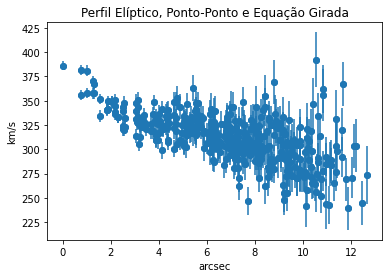

In [9]:
plt.title('Perfil Elíptico, Ponto-Ponto e Equação Girada')
plt.xlabel('arcsec')
plt.ylabel('km/s')
plt.errorbar(r, disp, yerr=erro, fmt='o')
plt.scatter(r, disp)
plt.savefig('/home/carlos/Desktop/ESO325 MUSE-ColletBinning (01-07-20)/Figs/PontoPonto Equação Girada.png',fmt='png',dpi=1200)

In [10]:
table = np.column_stack([r, disp,erro]) #Cria uma tabela com os dados
table = np.sort(table.view('f8,f8,f8'), order=['f0'], axis=0).view(np.float64) #Ordena os dados de menor raio para maior

In [11]:
np.savetxt('Elliptical Profile.txt', table, 
           fmt=b'%10.6f\t %10.6f\t \t%10.6f ',
          header='R(arcsec)\t Vel Disp(kms⁻¹)\t 1-sigma', delimiter='\t')